# 앤스콤 데이터 집합 불러오기

In [1]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

# matplotlib 라이브러리로 간단한 그래프 그리기

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

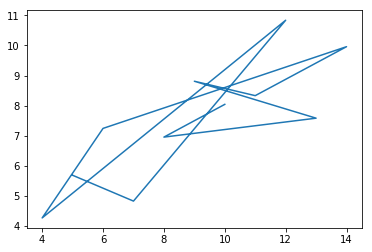

In [3]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
plt.plot(dataset_1['x'], dataset_1['y'])
plt.show()

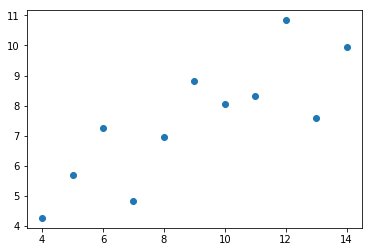

In [4]:
#  점 그래프
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

# 한 번에 4개의 그래프 그리기

In [5]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] =='III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

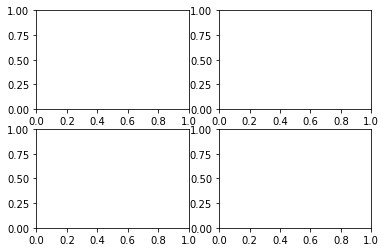

In [6]:
# 1. 기본 틀 생성
fig = plt.figure()

# 2. 그래프 격자 생성
# add_subplot(행 크기, 열 크기)
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

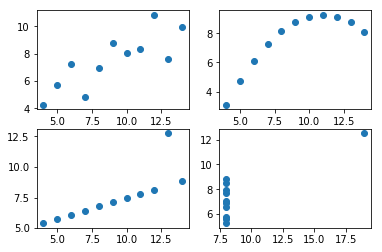

In [7]:
# plot 메서드에 데이터 전달
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')
fig

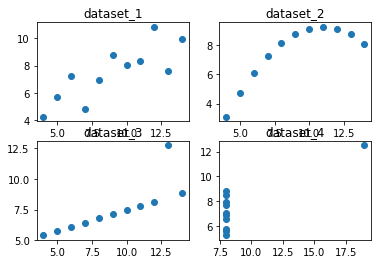

In [8]:
# 그래프 격자에 제목 추가
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')
fig

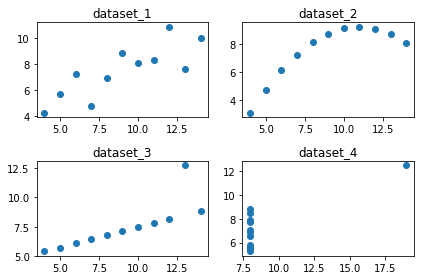

In [9]:
# 그래프 이름과 숫자가 겹쳐보이는 문제 해결
# tight_layout() 사용
fig.tight_layout()
fig

# 기초 그래프 그리기 - 히스토그램, 산점도, 박스 그래프

In [10]:
tips = sns.load_dataset('tips')
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


# 단변량 그래프 그리기 - 히스토그램

Text(0,0.5,'Total Bill')

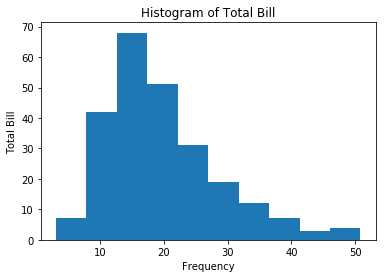

In [11]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

# 히스토그램
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

Text(0,0.5,'Tip')

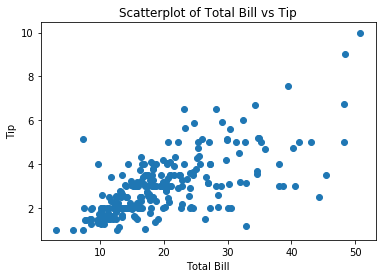

In [12]:
# 산점도 그래프
# total_bill에 따른 tip 
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0.5,1,'Boxplot of Tips by Sex')

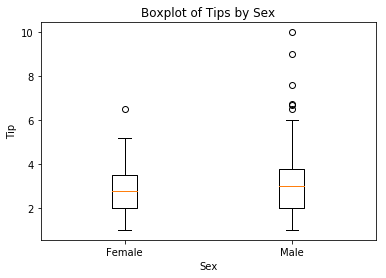

In [13]:
# 박스 그래프
# sex에 따른 tip
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex']=='Female']['tip'], tips[tips['sex']=='Male']['tip']],
             labels=['Female', 'Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

# 다변량 그래프 그리기

In [14]:
# 성별을 그래프의 색상으로 지정하기 위한 함수
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

In [15]:
# recode_sex가 반환한 값(0,1)을 데이터프레임에 sex_color열에 추가
tips['sex_color'] = tips['sex'].apply(recode_sex) # sex열에 recode_sex함수를 브로드캐스팅

# 데이터프레임과 시리즈로 그래프 그리기

Text(0,0.5,'Tip')

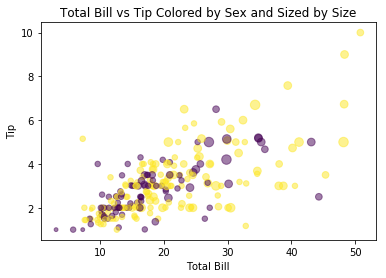

In [16]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*15,   # s: 점의 크기(size)
    c=tips['sex_color'], # c: 점의 색상(color)
    alpha=0.5)           # alpha: 점의 투명도
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

# seaborn 라이브러리 사용

In [17]:
import seaborn as sns
sns.set_style('whitegrid') # 그래프 스타일 적용
tips = sns.load_dataset('tips')

# 단변량 그래프 그리기 - 히스토그램

C:\Users\nonam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Total Bill Histogram with Density Plot')

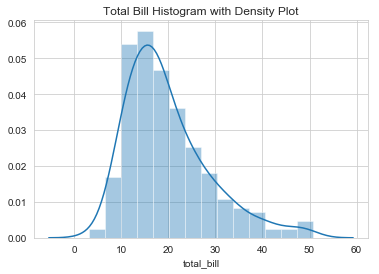

In [18]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

C:\Users\nonam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Total Bill')

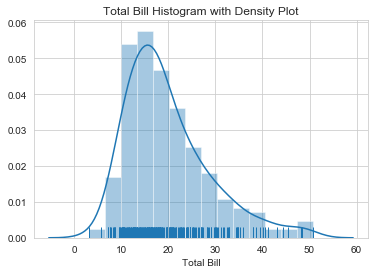

In [19]:
# 양탄자(rug) 그래프(= 밀집도 표현) 추가
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density Plot')
ax.set_xlabel('Total Bill')

Text(0,0.5,'Frequency')

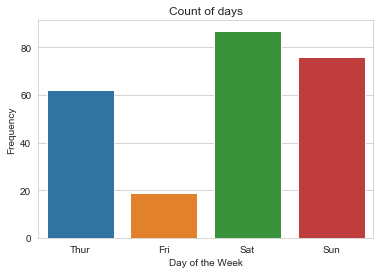

In [20]:
# count 그래프
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

# 다양한 종류의 이변량 그래프 그리기

C:\Users\nonam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Tip')

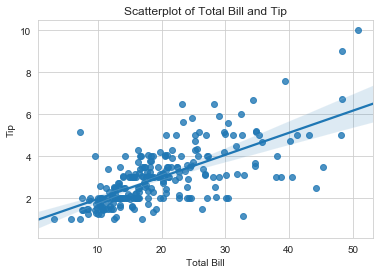

In [21]:
# 산점도 그래프 그리기
# regplot 사용 
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips) # 회귀선 제거시 : fit_reg = False
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

C:\Users\nonam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1.03,'Joint Plot of Total Bill and Tip')

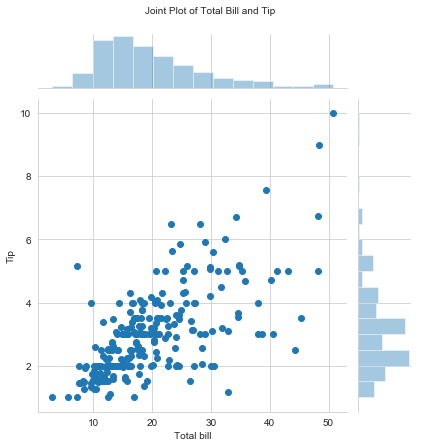

In [22]:
# 산점도와 히스토그램을 한번에 그리는 jointplot()
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

C:\Users\nonam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1.03,'Joint Plot of Total Bill and Tip')

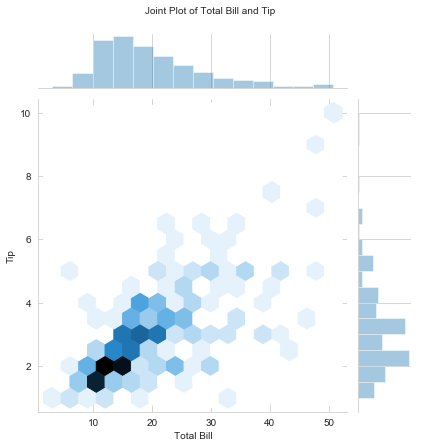

In [23]:
# 육각 그래프(hexbin) 
# 산점도 데이터는 점이 겹쳐 보일 경우 점을 구분하기 어려움
# 특정 데이터의 개수가 많아지면 점점 진한 색으로 표현
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

C:\Users\nonam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Tip')

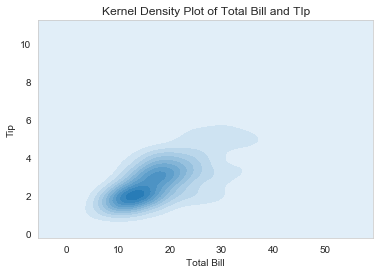

In [24]:
# 이차원 밀집도 그리기 
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'], data2=tips['tip'], shade=True) # shade: 음영 효과
ax.set_title('Kernel Density Plot of Total Bill and TIp')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

C:\Users\nonam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average total bill')

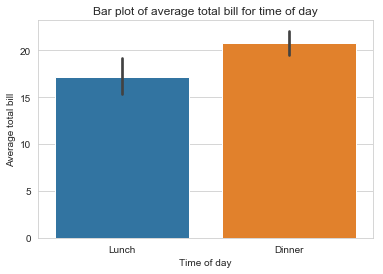

In [25]:
# 바 그래프 그리기( 지정한 변수의 평균을 계산)
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

Text(0,0.5,'Total Bill')

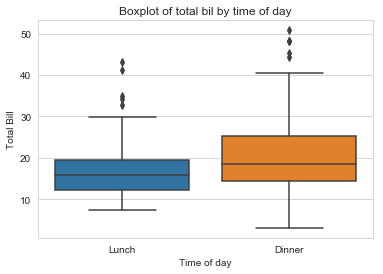

In [26]:
# 박스 그래프 그리기
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bil by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

C:\Users\nonam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Total Bill')

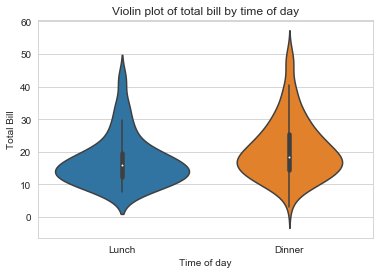

In [27]:
# 바이올린 그래프
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

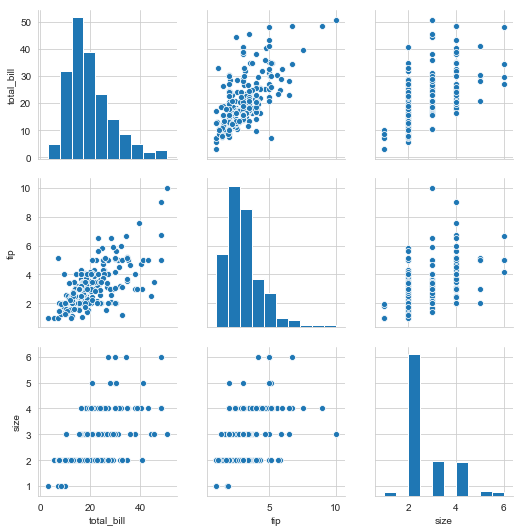

In [28]:
# 관계 그래프 그리기
fig = sns.pairplot(tips)

C:\Users\nonam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


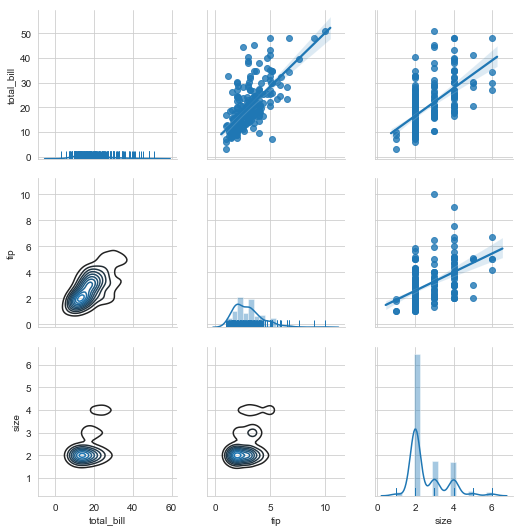

In [29]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot) # 대각선을 기준으로 위쪽에 그릴 그래프
pair_grid = pair_grid.map_lower(sns.kdeplot) # 대각선을 기준으로 아래쪽에 그릴 그래프
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) # 대각선을 중심으로 그릴 그래프
plt.show()

# 다변량 그래프 그리기

C:\Users\nonam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


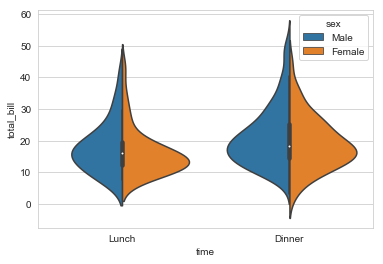

In [30]:
# 바이올린 그래프 그리기 - 색상 추가
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

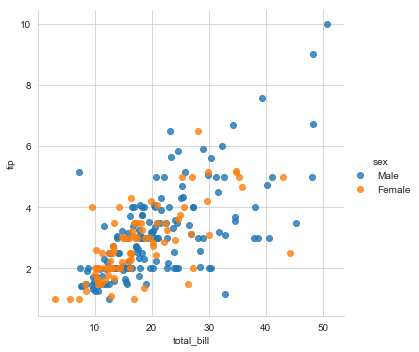

In [31]:
# 산점도 그래프 - 색상 추가
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

C:\Users\nonam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


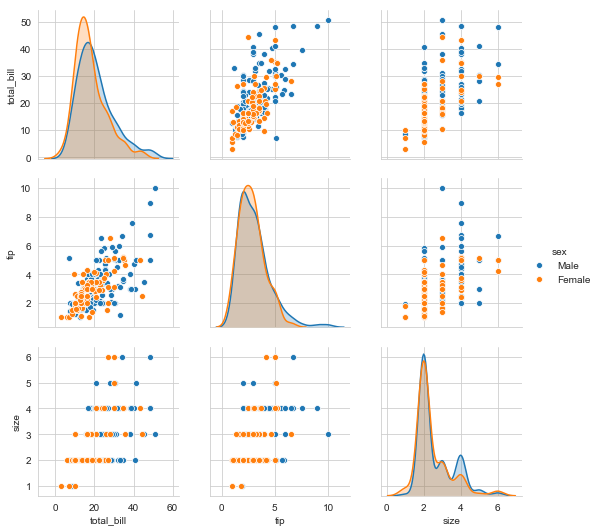

In [32]:
# 관계 그래프 그리기 - 색상 추가
fig = sns.pairplot(tips, hue='sex')

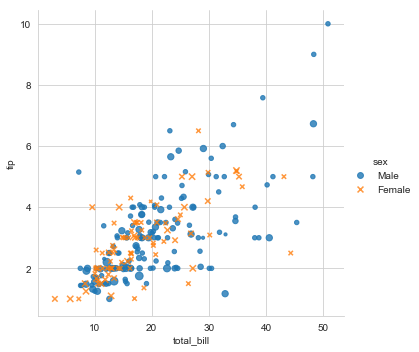

In [33]:
# 산점도 그래프 - 크기, 모양 조절
# 크기 조절 : scatter_kws = {}
# 모양 조절 : markers=[]
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                     markers=['o', 'x'] ,scatter_kws={'s':tips['size']*10})

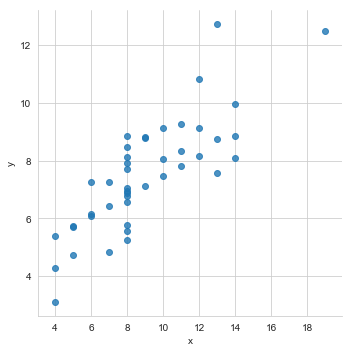

In [34]:
# lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False) # -> 4개의 데이터 그룹이 한꺼번에 그려짐

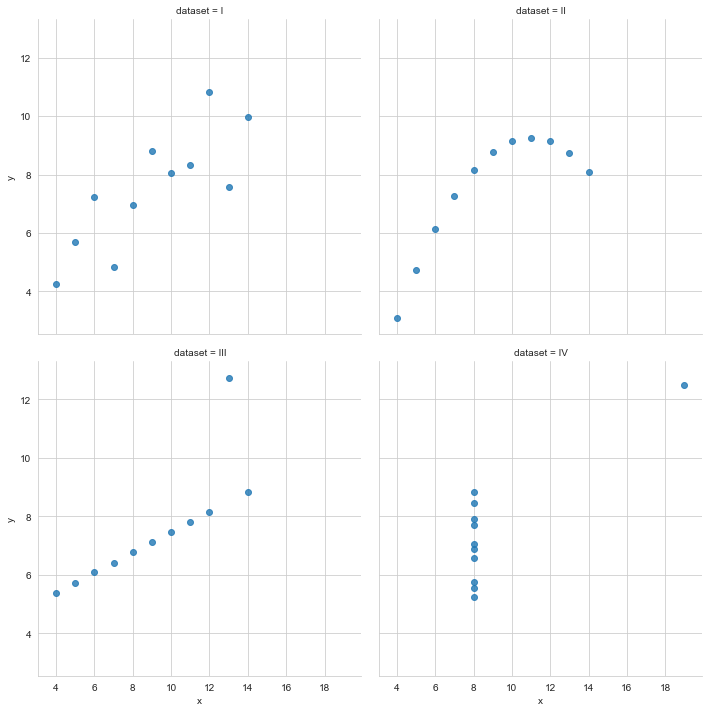

In [35]:
# 4개의 데이터 그룹 한 번에 그리기
# col : 데이터그룹을 구분할 열
# col_wrap : 그릴 열의 최댓값
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False,
                          col='dataset', col_wrap=2)

# 알아두면 좋아요

C:\Users\nonam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


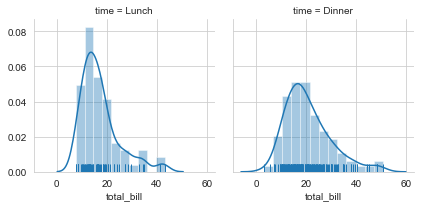

In [36]:
# FacetGrid
# 1. 객체 생성
facet = sns.FacetGrid(tips, col='time') # col: 데이터 그룹을 구분할 열
# 2. map()에 그래프의 종류와 x축으로 지정할 열 이름 전달
facet.map(sns.distplot, 'total_bill', rug=True) # rug : 양탄자 그래프 유무

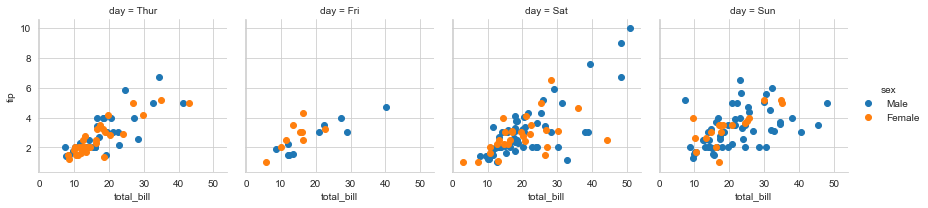

In [37]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

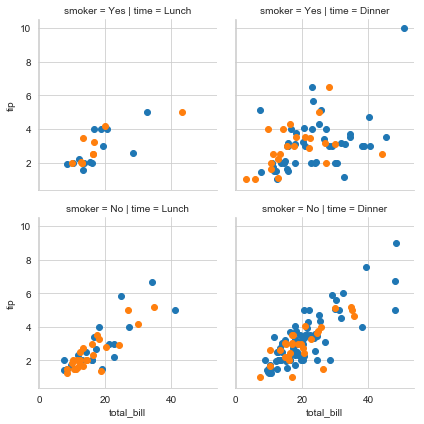

In [38]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')